In [24]:
import pandas as pd
  
reference_df = pd.read_csv("ligands/1a47_GLC_affinities.txt", delim_whitespace=True, header=None)
reference_df.drop(columns=[1, 3, 4], inplace=True)

reference_df[0] = reference_df[0].str.split('/').str[1]
reference_df[0] = reference_df[0].str.removesuffix(".pdb")

reference_df.sort_values(by=[2], inplace=True)

reference_df.rename(columns={0: "ligands/1a47_GLC_affinities.txt", 2: "ligands/1a47_GLC_affinities.txtValue"}, inplace=True)

reference_df.set_index("ligands/1a47_GLC_affinities.txt", inplace=True)

In [25]:
import os

directory = 'ligands'
 
all_ligands = reference_df
all_ligands

,ligands/1a47_GLC_affinities.txtValue
ligands/1a47_GLC_affinities.txt,
1ZXM,-7.8
2E0A,-7.6
2H57,-7.3
1N6H,-7.2
2I5T,-7.2
...,...
2LWL,116.6
2L4C,126.0
1RI0,128.9


In [26]:
for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f) and f != "ligands/.DS_Store":
            df = pd.read_csv(f, delim_whitespace=True, header=None, encoding = "ISO-8859-1")
            df.drop(columns=[1, 3, 4], inplace=True)
            df[0] = df[0].str.split('/').str[1]
            df[0] = df[0].str.removesuffix(".pdb")

            df.rename(columns={0: f, 2: f+"Value"}, inplace=True)
            df.set_index(f, drop=False, inplace=True)
            all_ligands = pd.concat([all_ligands, df], axis=1)
            del df

In [27]:
all_ligands

,ligands/1a47_GLC_affinities.txtValue,ligands/Didymin_affinities.txt,ligands/Didymin_affinities.txtValue,ligands/5g5j_MF8_affinities.txt,ligands/5g5j_MF8_affinities.txtValue,ligands/1ap9_RET_affinities.txt,ligands/1ap9_RET_affinities.txtValue,ligands/GLC_affinities (1).txt,ligands/GLC_affinities (1).txtValue,ligands/VitaminB3_affinities.txt,...,ligands/Diosmin_affinities.txt,ligands/Diosmin_affinities.txtValue,ligands/7-O-neohesperidosideNeodiosmin_affinities.txt,ligands/7-O-neohesperidosideNeodiosmin_affinities.txtValue,"ligands/_6,8-C,CDiglucosyldiosmetinisomer_affinities.txt","ligands/_6,8-C,CDiglucosyldiosmetinisomer_affinities.txtValue",ligands/Rutoside_affinities.txt,ligands/Rutoside_affinities.txtValue,ligands/retinal_affinities (1).txt,ligands/retinal_affinities (1).txtValue
1ZXM,-7.8,1ZXM,-10.2,1ZXM,-4.7,1ZXM,-8.0,1ZXM,-7.8,1ZXM,...,1ZXM,-10.1,1ZXM,-10.4,1ZXM,-9.9,1ZXM,-9.1288,1ZXM,-8.0
2E0A,-7.6,2E0A,-10.4,2E0A,-4.4,2E0A,-8.1,2E0A,-7.6,2E0A,...,2E0A,-10.1,2E0A,-10.6,2E0A,-8.7,2E0A,-10.6570,2E0A,-7.6
2H57,-7.3,2H57,-10.2,2H57,-4.6,2H57,-7.4,2H57,-7.3,NaN,...,2H57,-9.7,2H57,-9.0,2H57,-8.4,2H57,-9.6128,2H57,-8.1
1N6H,-7.2,1N6H,-9.4,1N6H,-4.4,1N6H,-7.9,1N6H,-7.2,1N6H,...,1N6H,-9.6,1N6H,-9.0,1N6H,-8.6,1N6H,-8.8335,1N6H,-7.8
2I5T,-7.2,2I5T,-9.9,2I5T,-4.5,2I5T,-7.1,2I5T,-7.2,2I5T,...,2I5T,-10.4,2I5T,-9.7,2I5T,-9.3,2I5T,-10.1635,2I5T,-7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6APD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6APD,-6.8
5Y2Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5Y2Z,-7.4
6NR8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6NR8,-7.8
6G4W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6G4W,-7.9


<AxesSubplot:>

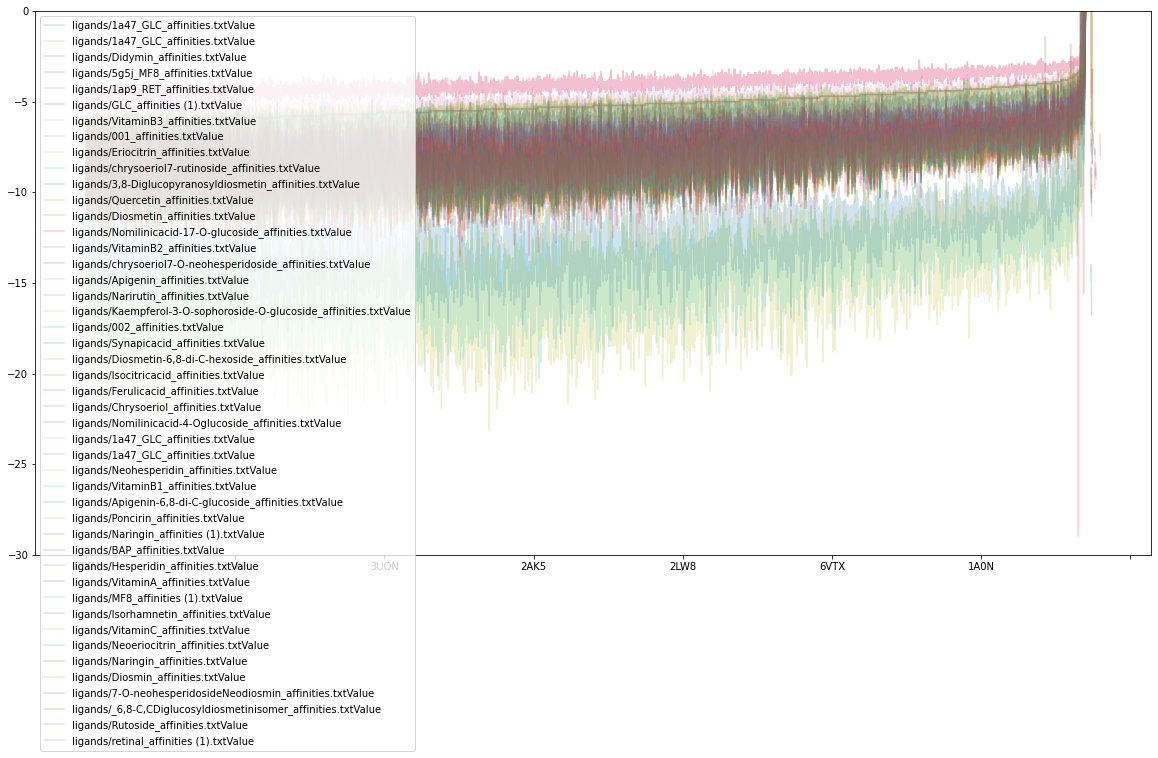

In [28]:
all_ligands.plot(y=all_ligands.columns, use_index=True, figsize=(20, 10), ylim=[-30,0], alpha=0.2)

In [29]:
glucose = pd.read_csv('glucose.txt', sep=', ')
glucose = list(glucose.columns)

/var/folders/md/mq4ytn6j4_7g73lhpm50744h0000gn/T/ipykernel_56050/4274403119.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  glucose = pd.read_csv('glucose.txt', sep=', ')


In [30]:
intersection = list(set(glucose) & set(list(all_ligands.index)))
intersection

['1CZA', '4ZW9', '5KZW', '1Z8D', '2NZT', '3HM8', '1V4S']

In [31]:
glucose_ligands = all_ligands.loc[intersection]
glucose_ligands

,ligands/1a47_GLC_affinities.txtValue,ligands/Didymin_affinities.txt,ligands/Didymin_affinities.txtValue,ligands/5g5j_MF8_affinities.txt,ligands/5g5j_MF8_affinities.txtValue,ligands/1ap9_RET_affinities.txt,ligands/1ap9_RET_affinities.txtValue,ligands/GLC_affinities (1).txt,ligands/GLC_affinities (1).txtValue,ligands/VitaminB3_affinities.txt,...,ligands/Diosmin_affinities.txt,ligands/Diosmin_affinities.txtValue,ligands/7-O-neohesperidosideNeodiosmin_affinities.txt,ligands/7-O-neohesperidosideNeodiosmin_affinities.txtValue,"ligands/_6,8-C,CDiglucosyldiosmetinisomer_affinities.txt","ligands/_6,8-C,CDiglucosyldiosmetinisomer_affinities.txtValue",ligands/Rutoside_affinities.txt,ligands/Rutoside_affinities.txtValue,ligands/retinal_affinities (1).txt,ligands/retinal_affinities (1).txtValue
1CZA,-5.8,1CZA,-8.9,1CZA,-4.3,1CZA,-7.1,1CZA,-5.8,1CZA,...,1CZA,-8.7,1CZA,-8.7,1CZA,-8.3,1CZA,-8.5039,1CZA,-7.5
4ZW9,-6.0,4ZW9,-10.6,4ZW9,-4.5,4ZW9,-8.5,4ZW9,-6.0,4ZW9,...,4ZW9,-10.6,4ZW9,-9.8,4ZW9,-8.5,4ZW9,-8.8754,4ZW9,-8.5
5KZW,-5.6,5KZW,-9.4,5KZW,-4.4,5KZW,-7.3,5KZW,-5.6,5KZW,...,5KZW,-9.4,5KZW,-9.2,5KZW,-8.1,5KZW,-8.5181,5KZW,-7.4
1Z8D,-6.5,1Z8D,-9.2,1Z8D,-4.8,1Z8D,-7.9,1Z8D,-6.5,1Z8D,...,1Z8D,-8.9,NaN,NaN,1Z8D,-8.5,1Z8D,-9.3565,1Z8D,-7.7
2NZT,-5.7,2NZT,-9.6,2NZT,-4.3,2NZT,-7.1,2NZT,-5.6,2NZT,...,2NZT,-10.1,2NZT,-9.4,2NZT,-8.8,NaN,NaN,2NZT,-7.2
3HM8,-5.7,3HM8,-9.4,3HM8,-4.2,3HM8,-6.8,3HM8,-5.7,3HM8,...,3HM8,-9.4,3HM8,-8.8,3HM8,-8.7,3HM8,-9.3696,3HM8,-6.8
1V4S,-5.5,NaN,NaN,1V4S,-4.4,1V4S,-7.5,1V4S,-5.7,1V4S,...,1V4S,-9.0,1V4S,-8.5,1V4S,-8.0,1V4S,-9.0178,1V4S,-7.3


In [32]:
#glucose_ligands.to_csv('glucose_costructures.csv')

In [33]:
#all_ligands.to_csv('all_ligands.csv') 

Text(0, 0.5, 'Affinity')

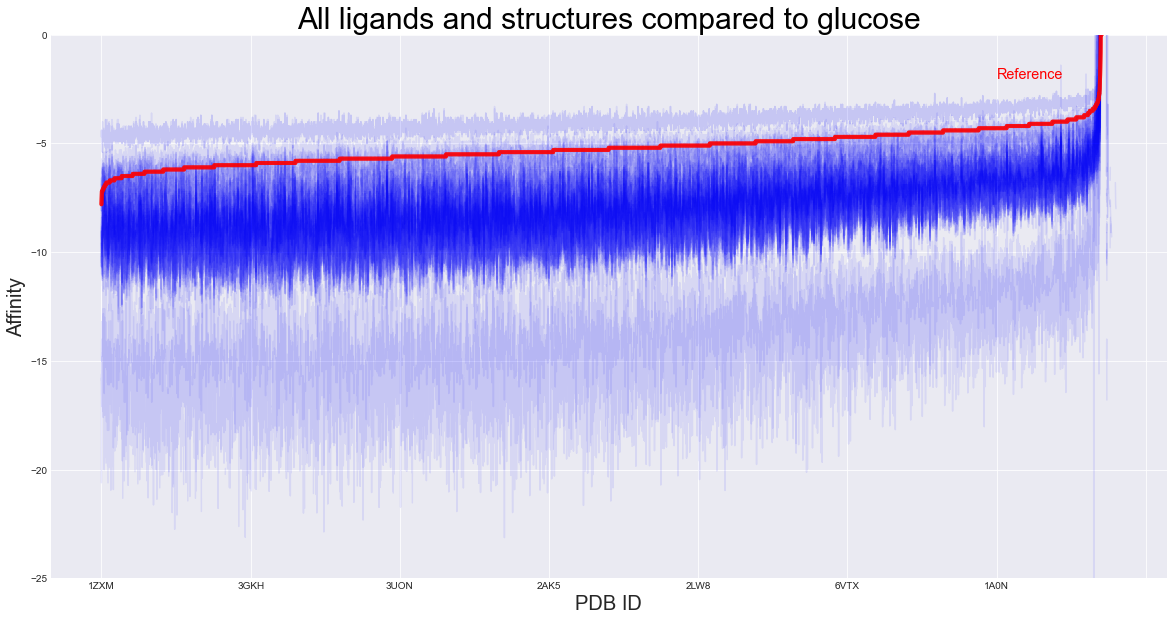

In [129]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-darkgrid')

all_ligands.plot(y=all_ligands.columns, 
                 use_index=True, 
                 figsize=(20, 10), 
                 ylim=[-25,0], 
                 alpha=0.08, 
                 legend=False, 
                 color='blue')

plt.plot(all_ligands.index, 
         all_ligands['ligands/1a47_GLC_affinities.txtValue'], 
         marker='', 
         color='red', 
         linewidth=4, 
         alpha=0.7)

plt.text('1A0N',
         -2,
         'Reference',
         fontsize='x-large', 
         color='red')


plt.title("All ligands and structures compared to glucose", loc='center', fontsize=30, fontweight=0, color='Black')
plt.xlabel("PDB ID", fontsize=20)
plt.ylabel("Affinity", fontsize=20)

[Text(0, 0, '1ZXM'),
 Text(1, 0, '2E0A'),
 Text(2, 0, '2H57'),
 Text(3, 0, '1N6H'),
 Text(4, 0, '2I5T'),
 Text(5, 0, '2VGB'),
 Text(6, 0, '3ZJC'),
 Text(7, 0, '5EKD'),
 Text(8, 0, '7ZEL'),
 Text(9, 0, '6L4B')]

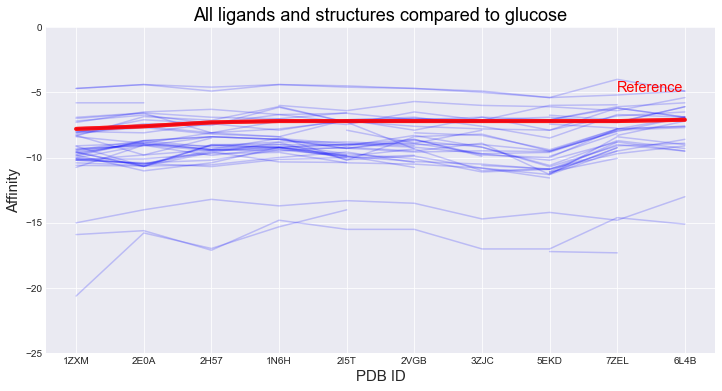

In [146]:
shortened = all_ligands[:'1A02']

shortened = all_ligands.iloc[:10]

plt.style.use('seaborn-darkgrid')

ax = shortened.plot(y=shortened.columns, 
                 use_index=True, 
                 figsize=(12, 6), 
                 ylim=[-25,0], 
                 alpha=0.2, 
                 legend=False, 
                 color='blue')

plt.plot(shortened.index, 
         shortened['ligands/1a47_GLC_affinities.txtValue'], 
         marker='', 
         color='red', 
         linewidth=4, 
         alpha=0.7)

plt.text(shortened.index[-2],
         -5,
         'Reference',
         fontsize='x-large', 
         color='red')


plt.title("All ligands and structures compared to glucose", loc='center', fontsize=18, fontweight=0, color='Black')
plt.xlabel("PDB ID", fontsize=15)
plt.ylabel("Affinity", fontsize=15)

ax.set_xticks(range(len(shortened)));
ax.set_xticklabels([item for item in shortened.index.tolist()])

#plt.savefig('test.png')

In [136]:
shortened.index

Index(['1ZXM', '2E0A', '2H57', '1N6H', '2I5T', '2VGB', '3ZJC', '5EKD', '7ZEL',
       '6L4B'],
      dtype='object')